<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/Water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data and Package

In [1]:
url = 'https://raw.githubusercontent.com/JaperTai77/data-modified/main/water_potability.csv'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as scs
import math

In [2]:
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Statistical Test

In [ ]:
potable = df[df.Potability == 1].reset_index()
non_potable = df[df.Potability == 0].reset_index()

### Monte Carlo Method

In [ ]:
def mcmc(data1, data2, col, color_choice, n = 50, s = 50):
  pvalue = []

  for i in range(s):
    x = scs.randint.rvs(low = 0, high = data1.shape[0]-1, size = n)
    x = list(x)
    data1_1 = data1.loc[x,col]
    y = scs.randint.rvs(low = 0, high = data2.shape[0]-1, size = n)
    y = list(y)
    data2_1 = data2.loc[y,col]
    
    # h0: data1 - data2 = 0
    z = (data1_1.mean() - data2_1.mean())/math.sqrt((data1_1.var()/n)+(data2_1.var()/n))
    p = scs.norm.pdf(z)*2
    pvalue.append(p)
  
  pvalue = pd.DataFrame(data = pvalue, columns = ['p'])
  pvalue['P'] = pvalue['p'].cumsum()
  pvalue['P'] = pvalue.apply(lambda x: pvalue['P']/(pvalue.index+1))
  
  plt.plot(pvalue['P'], color = color_choice, label = str('MCMC for %s' %col))

  return None

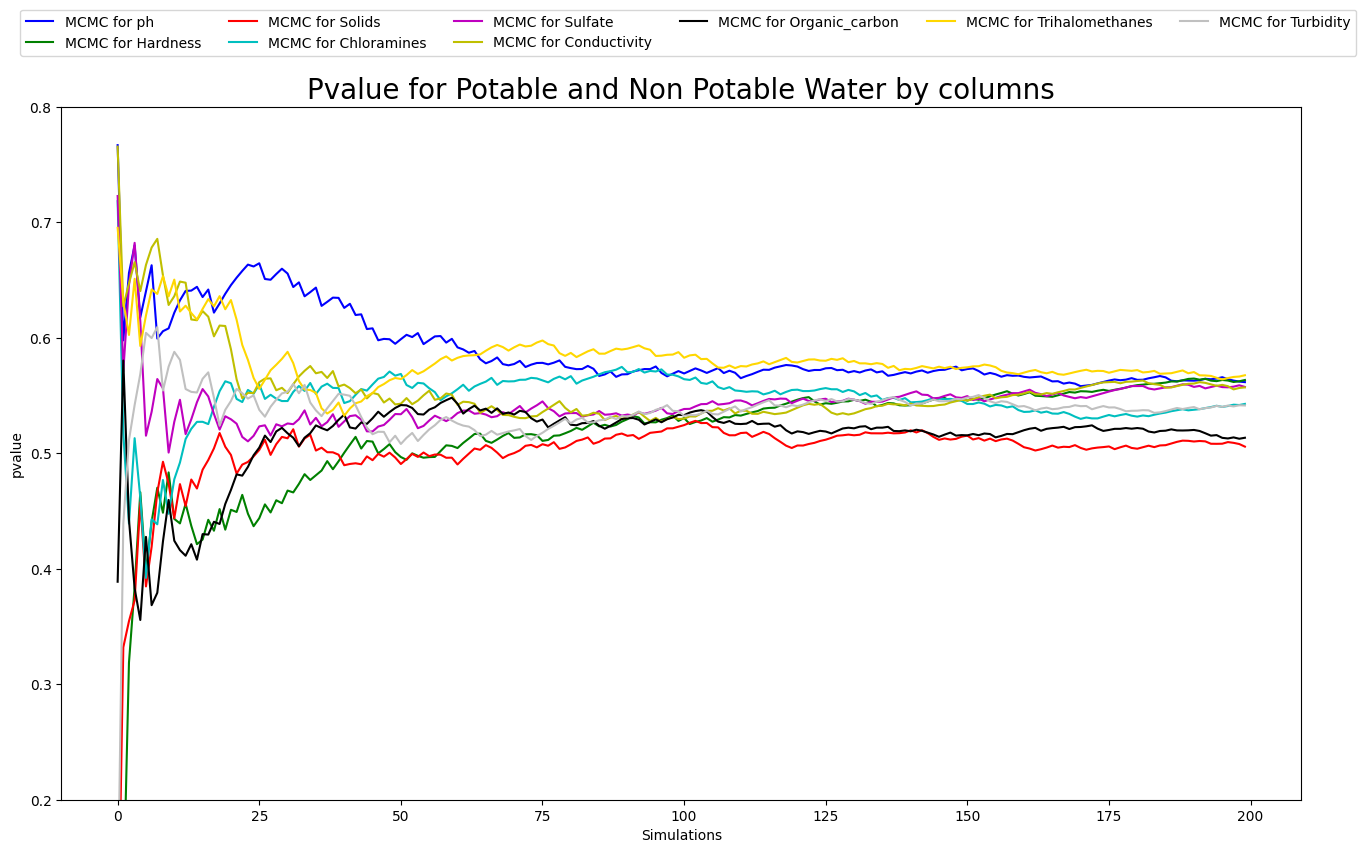

In [ ]:
color = ['b','g','r','c','m','y','k','gold','silver']

plt.style.use('default')
plt.figure(figsize = (16,9))
plt.ylim(0.2,0.8)
for j,c in enumerate(df.select_dtypes(['float']).columns):
  mcmc(potable,non_potable, col = c, n = 100,s = 200,color_choice = color[j])
plt.title('Pvalue for Potable and Non Potable Water by columns', fontsize = 20)
plt.legend(bbox_to_anchor=(1.05, 1.15), ncol = 6)
plt.xlabel('Simulations')
plt.ylabel('pvalue')
plt.show()

## Visualization

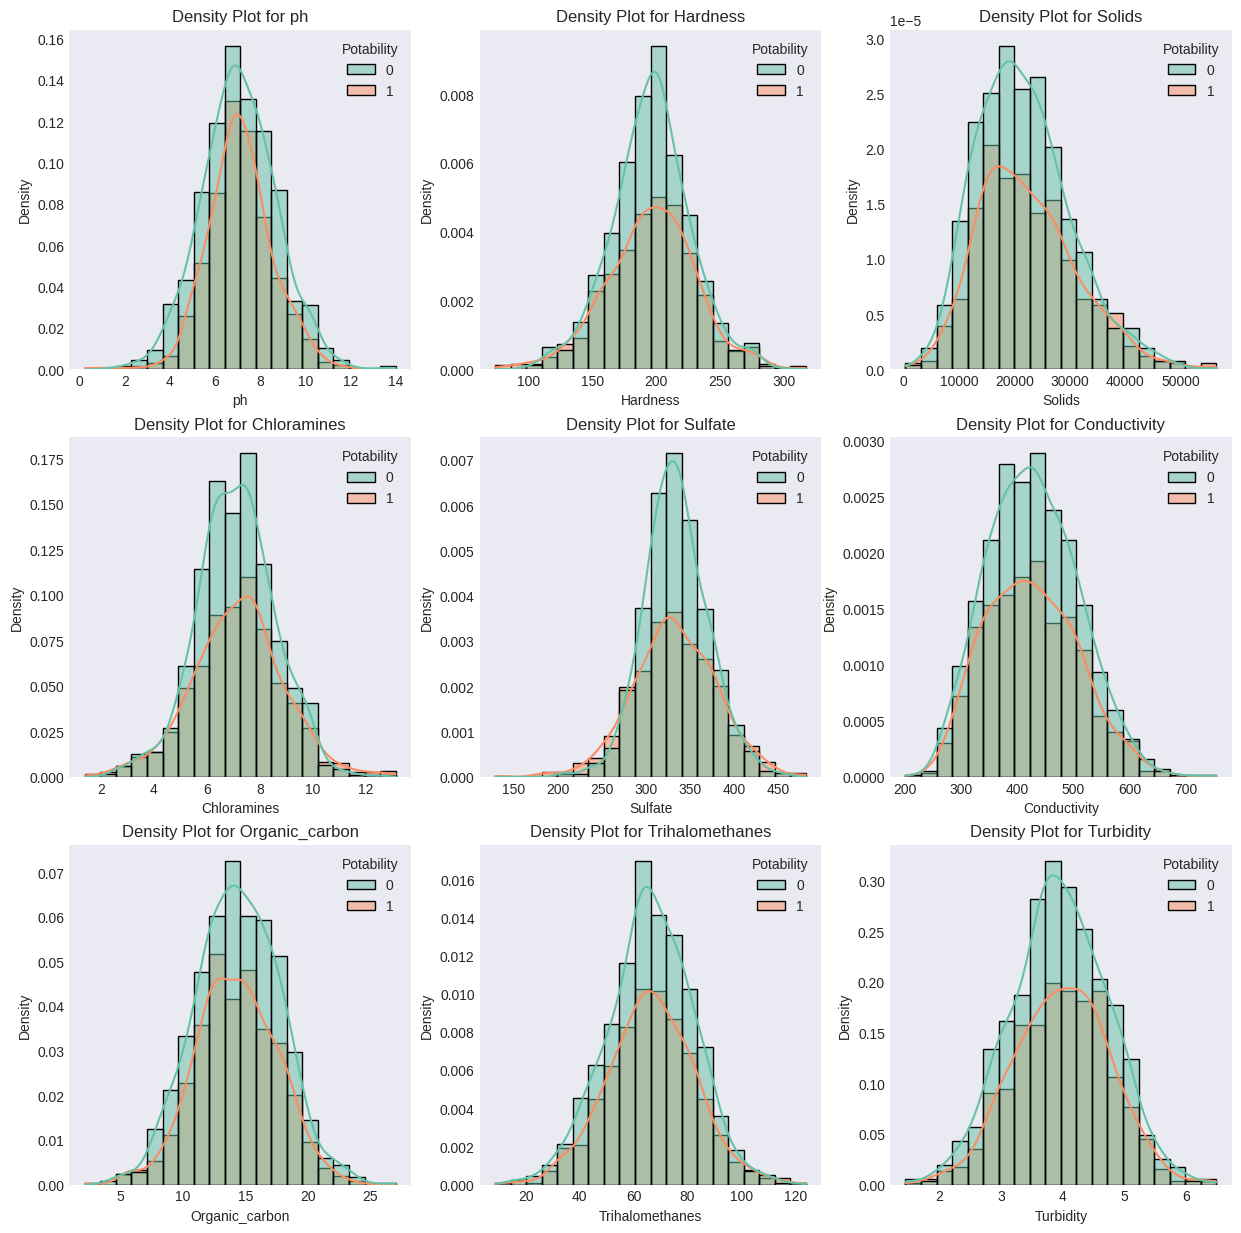

In [ ]:
df = df.dropna()

plt.style.use('seaborn-dark')
plt.figure(figsize = (15,15))
for j,c in enumerate(df.select_dtypes(['float']).columns):
  plt.subplot(3,3,j+1)
  sns.histplot(data = df, x = c, hue = 'Potability',bins = int(df[c].nunique()/100),kde=True,stat = 'density', palette= 'Set2').set_title('Density Plot for %s' %c)
plt.show()

In [3]:
# df = df.dropna()

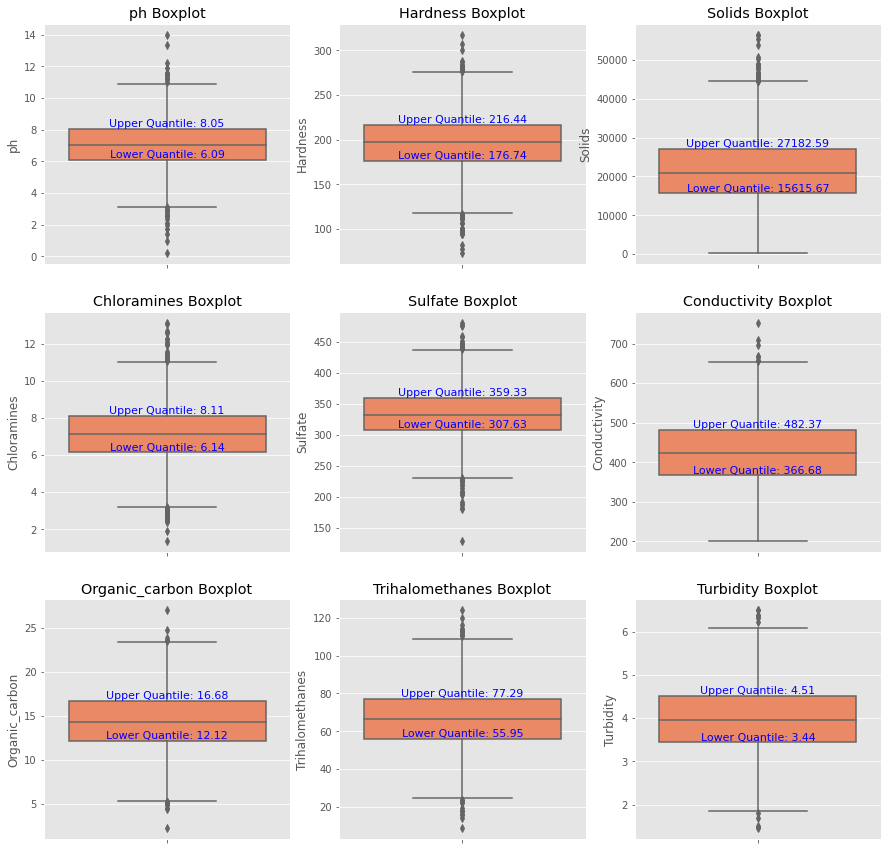

In [ ]:
def box_dist(df,x):
  quantile3 = df[x].quantile(0.75)
  quantile1 = df[x].quantile(0.25)

  sns.boxplot(y = df[x], color = 'coral')
  plt.text(0, quantile3, 'Upper Quantile: %s' %str(round(quantile3,2)), size=11, rotation=0,ha="center", va="bottom", color = 'blue')
  plt.text(0, quantile1, 'Lower Quantile: %s' %str(round(quantile1,2)), size=11, rotation=0,ha="center", va="bottom", color = 'blue')

plt.style.use('ggplot')
plt.figure(figsize = (15,15))
for j,c in enumerate(df.select_dtypes(['float']).columns):
  plt.subplot(3,3,j+1)
  box_dist(df = df,x = c)
  plt.title('%s Boxplot' %c)
plt.show()

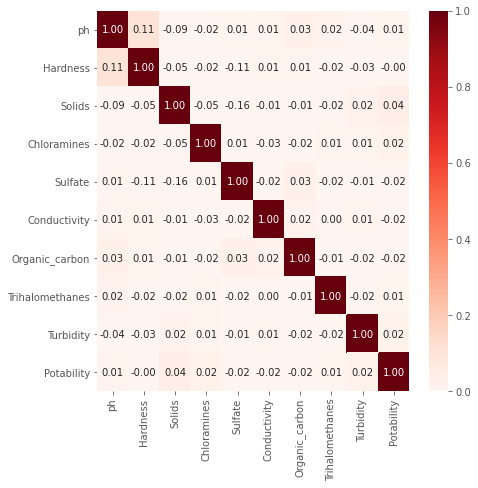

In [ ]:
cor = df.corr()
plt.figure(figsize = (7,7))
sns.heatmap(cor, cmap = "Reds", annot = True, 
            fmt = ".2f",vmin = 0, vmax = 1,)
plt.show()

## Machine Learning - Predicting Potability

In [4]:
df1 = df.select_dtypes("float").apply(lambda x: scs.zscore(x))

pd.options.display.float_format = '{:.5f}'.format
df1.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2011.00000,2011.00000,2011.00000,2011.00000,2011.00000,2011.00000,2011.00000,2011.00000,2011.00000
mean,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000
std,1.00025,1.00025,1.00025,1.00025,1.00025,1.00025,1.00025,1.00025,1.00025
min,-4.36029,-3.75382,-2.49957,-3.62495,-4.95752,-2.78721,-3.65741,-3.59755,-3.22979
25%,-0.63338,-0.58918,-0.72936,-0.62827,-0.62125,-0.74166,-0.67194,-0.65004,-0.67527
50%,-0.03731,0.03751,-0.11388,0.00604,-0.02409,-0.03805,-0.01074,0.00879,-0.00199
75%,0.61476,0.62749,0.60939,0.61561,0.63372,0.69209,0.69953,0.67760,0.69787
max,4.39558,3.71993,4.00126,3.78223,3.58797,4.05014,3.80520,3.58357,3.23657


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
dtypes: float64(9)
memory usage: 157.1 KB


In [5]:
Xtrain = df1.sample(frac = 0.8)
Xtest = df1.loc[~df1.index.isin(Xtrain.index)].copy()

ytrain = df.Potability.loc[Xtrain.index]
ytest = df.Potability.loc[Xtest.index]

In [13]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(Xtrain, ytrain)
ypred = forest.predict(Xtest)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,ypred))
confusion_matrix(ytest,ypred)

              precision    recall  f1-score   support

           0       0.67      0.87      0.76       232
           1       0.70      0.42      0.52       170

    accuracy                           0.68       402
   macro avg       0.69      0.64      0.64       402
weighted avg       0.68      0.68      0.66       402



array([[202,  30],
       [ 99,  71]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rft = RandomForestClassifier()


from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)

ne = [50,100]
c = ['gini', 'entropy']
max_depth = [50,200]
min_samples_leaf = [1,10]
n_estimators = [100,500]

from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': ne, 'max_depth': max_depth,'min_samples_leaf': min_samples_leaf, 'criterion' : c, 'n_estimators':n_estimators}
gs_inst = GridSearchCV(rft, param_grid= param_grid, cv =cv)
gs_inst.fit(Xtrain, ytrain)

print(gs_inst.best_params_)

{'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1, 'n_estimators': 500}


In [14]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'entropy', max_depth = 50, min_samples_leaf = 1, n_estimators = 500,min_samples_split=2,max_features= "sqrt")
forest.fit(Xtrain, ytrain)
ypred = forest.predict(Xtest)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest,ypred))
confusion_matrix(ytest,ypred)

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       232
           1       0.74      0.42      0.53       170

    accuracy                           0.69       402
   macro avg       0.71      0.65      0.65       402
weighted avg       0.70      0.69      0.67       402



array([[207,  25],
       [ 99,  71]])

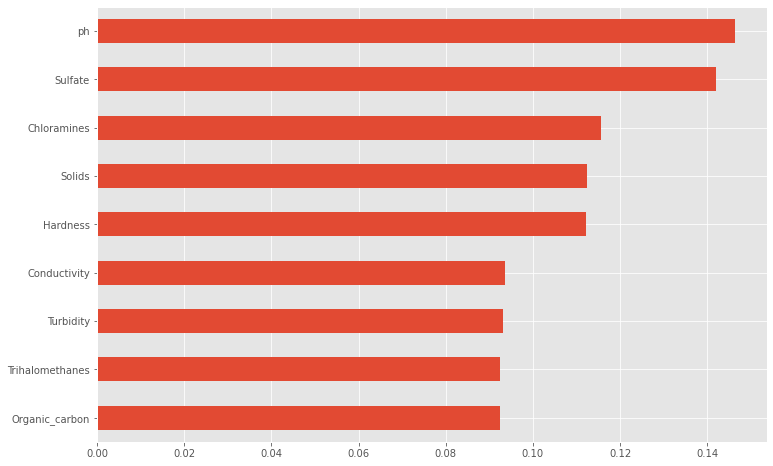

In [ ]:
feature_imp = pd.Series(data = forest.feature_importances_,index = Xtrain.columns).sort_values(ascending = False)

feature_imp.sort_values().plot.barh(figsize = (12, 8))

In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

forest = RandomForestClassifier()
sfs1 = sfs(forest,
           k_features=7, # Number of features to select
           forward=True, # Forward selection if True, backward selection otherwise
           floating=False, # Adds a conditional exclusion/inclusion if True.
           verbose=2,
           scoring='accuracy', # uses 'accuracy' for sklearn classifiers and 'r2' for sklearn regressors
           cv=3)
sfs1 = sfs1.fit(Xtrain, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.5s finished

[2021-08-01 06:42:07] Features: 1/7 -- score: 0.5649603472395935[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.6s finished

[2021-08-01 06:42:13] Features: 2/7 -- score: 0.5954214032259558[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.7s finished

[2021-08-01 06:42:19] Features: 3/7 -- score: 0.6128088607243115[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [26]:
# feature use
fea_col = list(sfs1.k_feature_idx_)
print(Xtrain.columns[fea_col])

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Trihalomethanes',
       'Turbidity'],
      dtype='object')


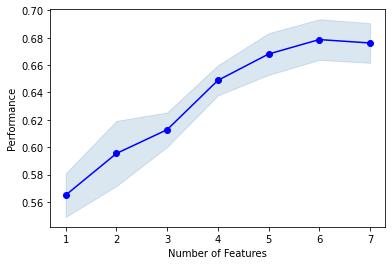

In [27]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plot_sfs(sfs1.get_metric_dict(),kind='std_dev');